In [1]:
# Crime in context 1975-2015

In [2]:
#librerías utilizadas
import pandas as pd
import numpy as np
import re
import os
import pymysql
from sqlalchemy import create_engine
import getpass
import matplotlib.pyplot as plt
import pprint
from bs4 import BeautifulSoup


import requests #para hacer las llamadas apis
import os #para moverte por el ordenador
from dotenv import load_dotenv #para cargar fichero env
load_dotenv() 
git_token = os.getenv("git_token")

In [3]:
#Selección de dataset Crimen en USA 1979-2015
#https://www.kaggle.com/marshallproject/crime-rates
origin = pd.read_csv(('../your-code/Input/report.csv'), engine = 'python')
origin.head()   


,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10


In [4]:
#Columnas 
columns = origin.columns
print(columns)
print(origin.shape)

Index(['report_year', 'agency_code', 'agency_jurisdiction', 'population',
       'violent_crimes', 'homicides', 'rapes', 'assaults', 'robberies',
       'months_reported', 'crimes_percapita', 'homicides_percapita',
       'rapes_percapita', 'assaults_percapita', 'robberies_percapita'],
      dtype='object')
(2829, 15)


In [5]:
#Separación de columnas
new = origin["agency_jurisdiction"].str.split(", ", n = 1, expand = True)

new.head()

,0,1
0,Albuquerque,NM
1,Arlington,TX
2,Atlanta,GA
3,Aurora,CO
4,Austin,TX


In [18]:
#Unirlo
result = pd.concat([origin, new], axis=1, sort=False)

crimen = result.rename(columns={0: "state", 1: "sig"})
display(crimen.head())



,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,state,sig
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,Albuquerque,NM
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,Arlington,TX
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,Atlanta,GA
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,Aurora,CO
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,Austin,TX


In [7]:
#Scrapeo


In [8]:
res = requests.get("https://www.worldatlas.com/articles/the-most-dangerous-states-in-the-u-s.html")

data = res.text

In [9]:
url = 'https://www.worldatlas.com/articles/the-most-dangerous-states-in-the-u-s.html'

In [10]:
soup = BeautifulSoup(data, 'html.parser')

soup

<!DOCTYPE html>

<html lang="en">
<head><meta charset="utf-8"/>
<script>(function(){function a(g,h,i){var j=new Date;j.setTime(j.getTime()+1e3*(60*(60*(24*i))));var k="expires="+j.toUTCString(),l=g+"="+h+";"+k+";path=/;";"undefined"!=typeof ezdomain&&(l+="domain="+ezdomain),document.cookie=l}var b=window.addEventListener?"addEventListener":"attachEvent",c=window[b],f="attachEvent"==b?"onmessage":"message";c(f,function(g){"undefined"!=typeof g.data.ezstatus&&(__ez.bit.AddAndFire(_ezaq.page_view_id,[new __ezDotData("dg",g.data.ezstatus)]),a("ezdg",g.data.ezstatus,730))})})();</script>
<script data-cfasync="false" data-pagespeed-no-defer="">var __ez=__ez||{};__ez.evt={};__ez.ck={};__ez.template={};__ez.template.isOrig=true;__ez.evt.add=function(e,t,n){e.addEventListener?e.addEventListener(t,n,!1):e.attachEvent?e.attachEvent("on"+t,n):e["on"+t]=n()},__ez.evt.remove=function(e,t,n){e.removeEventListener?e.removeEventListener(t,n,!1):e.detachEvent?e.detachEvent("on"+t,n):delete e["on"+t]};__

In [11]:
tabla = soup.select('#tableToggle')
print(tabla)
print(type(tabla))

[<section id="tableToggle">
<h2 class="tableToggle-h2">Violent Crime Rate By State</h2>
<ul>
<li>View information as a:</li>
<li class="chartBut-1 chartBut-active">List</li>
<li class="chartBut-2">Chart</li>
</ul>
<div id="artReg-table">
<table data-role="table">
<thead><tr><th>Rank</th><th>﻿State</th><th>Violent Crime Rate Per 100,000 Inhabitants </th></tr></thead>
<tbody><tr><td>1</td><td>Alaska </td><td>804</td></tr><tr><td>2</td><td>New Mexico</td><td>703</td></tr><tr><td>3</td><td>Nevada</td><td>678</td></tr><tr><td>4</td><td>Tennessee</td><td>633</td></tr><tr><td>5</td><td>Louisiana</td><td>566</td></tr><tr><td>6</td><td>Arkansas</td><td>551</td></tr><tr><td>7</td><td>Alabama</td><td>532</td></tr><tr><td>8</td><td>Missouri</td><td>519</td></tr><tr><td>9</td><td>Delaware</td><td>509</td></tr><tr><td>10</td><td>South Carolina</td><td>502</td></tr><tr><td>11</td><td>Maryland</td><td>472</td></tr><tr><td>12</td><td>Arizona</td><td>470</td></tr><tr><td>13</td><td>Michigan</td><td>459<

In [12]:
see = soup.select('#artReg-table > table:nth-child(1)')
html = soup.find_all("tbody")
print(html)
print(type(see))

[<tbody><tr><td>1</td><td>Alaska </td><td>804</td></tr><tr><td>2</td><td>New Mexico</td><td>703</td></tr><tr><td>3</td><td>Nevada</td><td>678</td></tr><tr><td>4</td><td>Tennessee</td><td>633</td></tr><tr><td>5</td><td>Louisiana</td><td>566</td></tr><tr><td>6</td><td>Arkansas</td><td>551</td></tr><tr><td>7</td><td>Alabama</td><td>532</td></tr><tr><td>8</td><td>Missouri</td><td>519</td></tr><tr><td>9</td><td>Delaware</td><td>509</td></tr><tr><td>10</td><td>South Carolina</td><td>502</td></tr><tr><td>11</td><td>Maryland</td><td>472</td></tr><tr><td>12</td><td>Arizona</td><td>470</td></tr><tr><td>13</td><td>Michigan</td><td>459</td></tr><tr><td>14</td><td>Oklahoma</td><td>450</td></tr><tr><td>15</td><td>California</td><td>445</td></tr><tr><td>16</td><td>Illinois</td><td>436</td></tr><tr><td>17</td><td>Texas</td><td>434</td></tr><tr><td>18</td><td>Florida</td><td>430</td></tr><tr><td>19</td><td>South Dakota</td><td>418</td></tr><tr><td>20</td><td>Indiana</td><td>405</td></tr><tr><td>21</td>

In [42]:
#Tabla pandas del scrapeo
crimen_paises = []
for fila in soup.find_all('tbody'):
    filas = [el for el in fila.find_all('tr')]
    if len(filas) > 0:
        for fila in filas:
            datos = fila.find_all('td')
            crimen = {
                "Rank":int(datos[0].text),
                "State": datos[1].text.strip(),
                "violence_rate":int(datos[2].text)

            }
            crimen_paises.append(crimen)       
crimen_paises   
crimen_scrap = pd.DataFrame(crimen_paises)

crimenscrapt = crimen_scrap.rename(columns={"State": "states"})
crimenscrapt.head()

,Rank,states,violence_rate
0,1,Alaska,804
1,2,New Mexico,703
2,3,Nevada,678
3,4,Tennessee,633
4,5,Louisiana,566


In [14]:
scrapstates = {"states" : ["Alaska", "New Mexico", "Nevada", " Tennessee", "Louisiana", "Arkanas", "Alabama",
                           "Missouri", "Delaware", "South Carolina", "Maryland", "Arizona", "Michigan", 
                           "Oklahoma", "California", "Illinois", "Texas", "Florida", "South Dakota", "Indiana", 
                           "Georgia", "Kansas", "Massachusetts", "New York", "North Carolina", "Montana", 
                           "West Virginia","Colorado", "Pennsylvania", "Hawaii", "Wisconsin", "Washington",
                           "Ohio", "Nebraska", "Iowa", "Mississippi", "Oregon", "North Dakota", "New Jersey",
                           "Wyoming", "Utah",  "Minnesota", "Rhode Island", "Kentucky", "Idaho", "Connecticut",
                           "Virginia", "New Hampshire", "Vermont", "Maine"], "sig" : ["AL", "NM", "NV", "TN", "LA", "AR", "AL", "MO", "DE", "SC", "MD", "AZ", "MI", "OK", "CA",
                     "IL", "TX", "FL", "SD", "IN", "GA", "KS", "MA", "NY", "NC", "MT", "WV", "CO", "PA", "HI",
                     "WI", "WA", "OH", "NE", "IA", "MS", "OR", "ND", "NJ", "WY", "UT", "MN",  "RI", "KY", "ID",
                     "CT", "VA", "NH", "VT", "ME"]}                       
                           
states_acron = pd.DataFrame(scrapstates)
states_acron. head()

,states,sig
0,Alaska,AL
1,New Mexico,NM
2,Nevada,NV
3,Tennessee,TN
4,Louisiana,LA


In [19]:
#Merge
mergescrap = pd.merge(states_acron, crimenscrapt , how='left', on=['states'])
mergescrap.head()

,states,sig,Rank,violence_rate
0,Alaska,AL,1.0,804.0
1,New Mexico,NM,2.0,703.0
2,Nevada,NV,3.0,678.0
3,Tennessee,TN,NaN,NaN
4,Louisiana,LA,5.0,566.0


In [21]:
#Unir las tablas en una misma
mergestot = pd.merge(crimen, mergescrap , how = "left", on = ["sig"])
mergestot.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,months_reported,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,state,sig,states,Rank,violence_rate
0,1975,NM00101,"Albuquerque, NM",286238.0,2383.0,30.0,181.0,1353.0,819.0,12.0,832.52,10.48,63.23,472.68,286.13,Albuquerque,NM,New Mexico,2.0,703.0
1,1975,TX22001,"Arlington, TX",112478.0,278.0,5.0,28.0,132.0,113.0,12.0,247.16,4.45,24.89,117.36,100.46,Arlington,TX,Texas,17.0,434.0
2,1975,GAAPD00,"Atlanta, GA",490584.0,8033.0,185.0,443.0,3518.0,3887.0,12.0,1637.44,37.71,90.30,717.10,792.32,Atlanta,GA,Georgia,21.0,398.0
3,1975,CO00101,"Aurora, CO",116656.0,611.0,7.0,44.0,389.0,171.0,12.0,523.76,6.00,37.72,333.46,146.58,Aurora,CO,Colorado,28.0,343.0
4,1975,TX22701,"Austin, TX",300400.0,1215.0,33.0,190.0,463.0,529.0,12.0,404.46,10.99,63.25,154.13,176.10,Austin,TX,Texas,17.0,434.0


In [ ]:
#Análisis

In [22]:
#Cuantos  nulos hay en cada columna
empty_values = mergestot.isnull().sum()
empty_values



report_year              0
agency_code             41
agency_jurisdiction      0
population              69
violent_crimes          35
homicides               34
rapes                   75
assaults                76
robberies               75
months_reported        137
crimes_percapita        35
homicides_percapita     34
rapes_percapita         75
assaults_percapita      76
robberies_percapita     75
state                    0
sig                     41
states                  82
Rank                   164
violence_rate          164
dtype: int64

In [ ]:
#Estados con más violencia según el tipo de crimen que acontece. 

In [23]:
#En estos 40 años el 93% de la violencia suceden en el mes de diciembre
mergestot["months_reported"].value_counts()



12.0    2639
0.0       18
11.0       9
10.0       7
8.0        4
5.0        3
6.0        3
9.0        3
4.0        2
3.0        2
1.0        1
7.0        1
Name: months_reported, dtype: int64

In [43]:
#En estos 40 años los 5 estados con más crímenes sufrieron entre 1975 y 2015 fueron por este orden
#Georgia(GA), New Jersey(NJ), Michigan(MI), Missouri(MO), Columbia(DC)

cleanorigin = mergestot.drop(columns=["violent_crimes", "homicides", "rapes", "assaults","robberies"] )
cleanorigin
# Eliminar las siguientes columnas pues las que me interesan son aquellas que se mide por el ratio per-capital
#violent_crimes, homicides, rapes, assaults, robberies.
region = cleanorigin.groupby('sig', as_index=True).agg({'crimes_percapita':'mean','violence_rate':'mean' ,'homicides_percapita':'mean','rapes_percapita':'mean','assaults_percapita':'mean', 'robberies_percapita':'mean'})
region
violent = region.sort_values('crimes_percapita', ascending=False)
violence = violent.iloc[0:5]
violence

,crimes_percapita,violence_rate,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
sig,,,,,,
GA,2425.925610,398.0,35.198293,96.816098,1331.294878,962.615610
NJ,2237.503171,245.0,32.940244,82.644634,903.640488,1218.279268
MI,2218.484878,459.0,47.026829,95.829268,1065.069512,1010.558537
MO,2016.476829,519.0,33.736707,79.581463,1141.522317,761.636463
DC,1755.475854,NaN,40.511463,48.311951,769.978780,896.671220


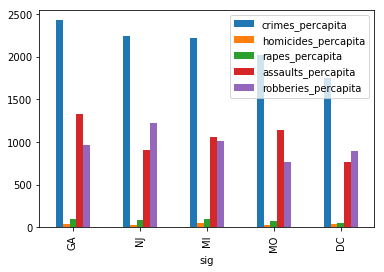

In [29]:
#Gráfico general
violence.index
violence.plot.bar()

In [45]:
#Los 5 estados con más violencia de crímenes sufrieron según dicho scrapeo son
#New Mexico(NM), Nevada(NV),  Louisiana(LA), Missouri(MO),  Maryland(MD)
crimenes = region.sort_values('violence_rate', ascending=False)
crimenesscr = crimenes.iloc[0:5]
crimenesscr

,crimes_percapita,violence_rate,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita
sig,,,,,,
NM,1049.775854,703.0,10.210000,61.952927,684.761463,292.850732
NV,890.695366,678.0,13.294390,58.034390,406.268780,413.097561
LA,1341.764878,566.0,48.710000,61.976829,564.947805,666.129024
MO,2016.476829,519.0,33.736707,79.581463,1141.522317,761.636463
MD,994.267362,472.0,14.133252,38.229755,504.383865,437.520061


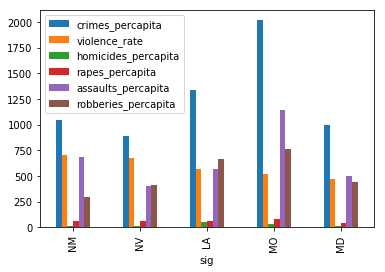

In [46]:
crimenesscr.index
crimenesscr.plot.bar()

In [31]:
#Los 5 estados con más homicidios entre 1979 y 2015 fueron por este orden
#Louisiana(LA), Michigan(MI), Columbia(DC), Georgia(GA), Missouri(MO).

homic = violent[["homicides_percapita"]]
homicides = homic.sort_values('homicides_percapita', ascending=False)
homicid = homicides.iloc[0:5]
homicid


,homicides_percapita
sig,
LA,48.710000
MI,47.026829
DC,40.511463
GA,35.198293
MO,33.736707


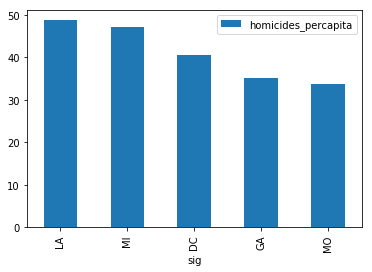

In [32]:
#Gráfico homicidios
homicid.index
homicid.plot.bar()

In [33]:
#En estos 40 años los 5 estadps que más violaciones han sufrido entre 1975 y 2015 fueron por este orden 
#Virginia(VA), Hawaii(HI), New York(NY), Kentucky(KY) y Maryland (MD) 
rap = violent[["rapes_percapita"]]
rapes = rap.sort_values('rapes_percapita')
rape = rapes.iloc[0:5]
rape

,rapes_percapita
sig,
VA,19.613902
HI,28.688780
NY,29.820610
KY,30.816923
MD,38.229755


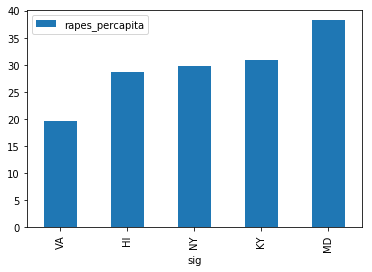

In [34]:
rape.index
rape.plot.bar()

In [36]:
#En estos 40 años los 5 estados que más asaltos han sufrido entre 1975 y 2015 fueron por este orden 
#Georgia(GA), Missouri(MO), Michigan(MI), Florida(FL),  New Jersey(NJ)

assa = violent[["assaults_percapita"]]
assaults = assa.sort_values('assaults_percapita', ascending=False)
assau = assaults.iloc[0:5]
assau

,assaults_percapita
sig,
GA,1331.294878
MO,1141.522317
MI,1065.069512
FL,964.493251
NJ,903.640488


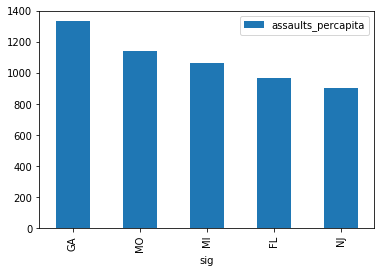

In [37]:
assau.index
assau.plot.bar()

In [39]:
#En estos 40 años los 5 estados que más robos han sufrido entre 1975 y 2015 fueron por este orden 
#New Jersey(NJ), Michigan(MI), Georgia(GA), Columbia(DC),  Missouri(MO)

rob = violent[["robberies_percapita"]]
robberies = rob.sort_values('robberies_percapita', ascending=False)
robs = robberies.iloc[0:5]
robs

,robberies_percapita
sig,
NJ,1218.279268
MI,1010.558537
GA,962.615610
DC,896.671220
MO,761.636463


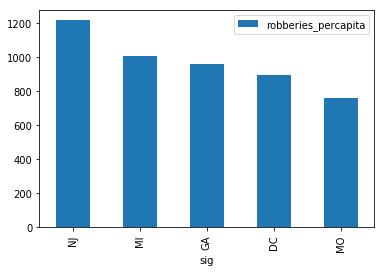

In [40]:
robs.index
robs.plot.bar()

In [41]:
'''
Conclusión: En función del tipo de crimen, homicidios, asaltos, violaciones o robos, unos estados u otros
son más peligrosos en Estados Unidos. 
Mientras que generalmente en 

Crímenes
En estos 40 años los 5 estados con más crímenes sufrieron entre 1975 y 2015 fueron por este orden
Georgia(GA), New Jersey(NJ), Michigan(MI), Missouri(MO), Columbia(DC)

Scrapeo
Los 5 estados con más violencia de crímenes sufrieron según dicho scrapeo son
New Mexico(NM), Nevada(NV),  Louisiana(LA), Missouri(MO),  Maryland(MD)

Homicidios
Los 5 estados con más homicidios entre 1979 y 2015 fueron por este orden
Louisiana(LA), Michigan(MI), Columbia(DC), Georgia(GA), Missouri(MO).

Violaciones
En estos 40 años los 5 estadps que más violaciones han sufrido entre 1975 y 2015 fueron por este orden 
Virginia(VA), Hawaii(HI), New York(NY), Kentucky(KY) y Maryland (MD) 

Asaltos
En estos 40 años los 5 estados que más asaltos han sufrido entre 1975 y 2015 fueron por este orden 
Georgia(GA), Missouri(MO), Michigan(MI), Florida(FL),  New Jersey(NJ)

Robos
En estos 40 años los 5 estados que más robos han sufrido entre 1975 y 2015 fueron por este orden 
New Jersey(NJ), Michigan(MI), Georgia(GA), Columbia(DC),  Missouri(MO)
'''